# University Queries

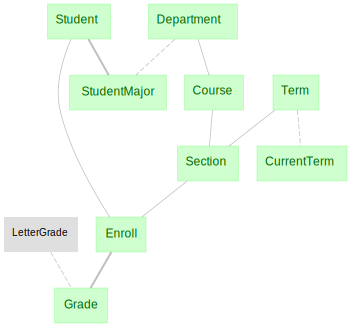

In [2]:
from university import *

dj.config['display.limit'] = 5  # keep ouptput short

dj.Diagram(schema)

In [3]:
assert Grade(), "populate the database first"

# Single-Table Queries

In [4]:
# All student info. Displaying a query gives you a preview of the results but does not fetch the data into memory.
Student()

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1000,Allison,Hill,F,1994-10-30,819 Johnson Course,East William,AK,74064,+1-586-737-9402x6542
1001,James,Howard,M,2008-03-07,78161 Calderon River Suite 931,Lake Jeremyport,CO,31013,(547)452-5534x1928
1002,Devin,Schaefer,M,1997-02-22,503 Linda Locks,Carlshire,FM,94599,+1-876-772-4238x8496
1003,Zachary,Hicks,M,1993-02-21,22691 James Mountain,Tashatown,TX,94967,+1-645-414-6270
1004,Brian,Garrett,M,1995-09-02,52880 Burns Creek,Natashaport,IA,08093,001-411-671-8227


In [5]:
# You can fetch the data into memory using the fetch() method.
query = Student()  # forms the query
data = query.fetch()  # fetches query results into memory
# See help(query.fetch) help help(query.fetch1) for more options.

data

array([(1000, 'Allison', 'Hill', 'F', datetime.date(1994, 10, 30), '819 Johnson Course', 'East William', 'AK', '74064', '+1-586-737-9402x6542'),
       (1001, 'James', 'Howard', 'M', datetime.date(2008, 3, 7), '78161 Calderon River Suite 931', 'Lake Jeremyport', 'CO', '31013', '(547)452-5534x1928'),
       (1002, 'Devin', 'Schaefer', 'M', datetime.date(1997, 2, 22), '503 Linda Locks', 'Carlshire', 'FM', '94599', '+1-876-772-4238x8496'),
       ...,
       (2997, 'Anna', 'Thomas', 'F', datetime.date(2005, 2, 27), '2926 Chapman Fort Suite 201', 'West Donald', 'CT', '33462', '263.502.9862x8118'),
       (2998, 'Jeanette', 'Meyer', 'F', datetime.date(2003, 1, 3), '135 Emily Gateway Suite 478', 'West Mark', 'RI', '16828', '481.533.9172x3288'),
       (2999, 'Michael', 'Kirby', 'M', datetime.date(1994, 9, 11), '87055 Shaffer Burg', 'Hannahfort', 'MD', '46623', '613-369-0702x4991')],
      shape=(2000,), dtype=[('student_id', '<i8'), ('first_name', 'O'), ('last_name', 'O'), ('sex', 'O'), ('da

All following examples will only show query previews without fetching the data into memory.

In [6]:
# Show female students from Utah
Student & {'home_state': 'UT', 'sex': "F"}

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1065,Amy,Fry,F,1999-01-06,687 Teresa Row,Floydmouth,UT,55069,862-487-3342x7086
1078,Cynthia,Wilson,F,2009-06-19,669 Bailey Manors,South Cynthia,UT,85076,(282)774-2257
1162,Allison,Garrett,F,1995-12-10,660 Bailey Valley,North Danielle,UT,37414,744-888-5015
1251,Kimberly,Myers,F,2007-08-01,427 Thompson Station,Lake Amandamouth,UT,06760,516.347.0900x63353
1350,Taylor,Ho,F,2001-08-09,87056 Edward Cliff,West Jacquelineborough,UT,12801,610-697-9215x83503


In [7]:
# Show names female students not from Utah
((Student & {'sex': "F"}) - {'home_state': 'UT'}).proj('first_name', 'last_name')

student_id university-wide ID number,first_name,last_name
1000,Allison,Hill
1007,Cindy,Morales
1008,Bonnie,Brewer
1009,Natalie,Moore
1018,Carla,Collins


In [8]:
# Show full names of female students not from Utah
(Student & "sex='F' AND home_state <> 'UT'").proj(full_name='CONCAT(first_name, " ",last_name)')

student_id university-wide ID number,full_name calculated attribute
1000,Allison Hill
1007,Cindy Morales
1008,Bonnie Brewer
1009,Natalie Moore
1018,Carla Collins


In [9]:
# Show the three youngest students named "David"
Student & {'first_name': 'David'} & dj.Top(limit=3, order_by='date_of_birth DESC')

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1306,David,Martinez,M,2009-08-24,823 Wilson Forge,West Dillonland,VA,91150,847-531-5847x768
1369,David,Hudson,M,2009-08-05,0968 Melissa Estates,Woodbury,HI,62389,952.541.0397
1481,David,Barnes,M,2009-10-09,863 Kyle Tunnel Suite 170,Carterfurt,GA,46989,(240)326-3558x243


In [10]:
# Show student names and their ages in years
Student.proj('first_name', 'last_name', age='FLOOR(DATEDIFF(CURDATE(), date_of_birth) / 365.25)')

student_id university-wide ID number,first_name,last_name,age calculated attribute
1000,Allison,Hill,31
1001,James,Howard,17
1002,Devin,Schaefer,28
1003,Zachary,Hicks,32
1004,Brian,Garrett,30


In [11]:
# IDs of sudents whose birthday is today
(Student & 'month(date_of_birth) = month(CURDATE()) AND day(date_of_birth) = day(CURDATE())').proj()

student_id university-wide ID number
1108
1673
2602


In [12]:
# Students with their age and all other attributes
# ... is used to select all attributes in addition to the calculated ones
Student.proj(..., age='FLOOR(DATEDIFF(CURDATE(), date_of_birth) / 365.25)')

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881,age calculated attribute
1000,Allison,Hill,F,1994-10-30,819 Johnson Course,East William,AK,74064,+1-586-737-9402x6542,31
1001,James,Howard,M,2008-03-07,78161 Calderon River Suite 931,Lake Jeremyport,CO,31013,(547)452-5534x1928,17
1002,Devin,Schaefer,M,1997-02-22,503 Linda Locks,Carlshire,FM,94599,+1-876-772-4238x8496,28
1003,Zachary,Hicks,M,1993-02-21,22691 James Mountain,Tashatown,TX,94967,+1-645-414-6270,32
1004,Brian,Garrett,M,1995-09-02,52880 Burns Creek,Natashaport,IA,08093,001-411-671-8227,30


In [13]:
# Show all info except for the date of birth and phone number
Student.proj(..., '-date_of_birth', '-home_phone')

student_id university-wide ID number,first_name,last_name,sex,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979
1000,Allison,Hill,F,819 Johnson Course,East William,AK,74064
1001,James,Howard,M,78161 Calderon River Suite 931,Lake Jeremyport,CO,31013
1002,Devin,Schaefer,M,503 Linda Locks,Carlshire,FM,94599
1003,Zachary,Hicks,M,22691 James Mountain,Tashatown,TX,94967
1004,Brian,Garrett,M,52880 Burns Creek,Natashaport,IA,08093


In [14]:
# Show all students who are either from Utah or California
Student & [{'home_state': 'UT'}, {'home_state': 'CA'}]  # condition in a list are combined with OR

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1015,Joseph,Sims,M,2004-12-23,434 Flores Plains,East Edwardfurt,UT,20529,866-858-7603
1023,Christopher,Thompson,M,1995-07-09,7974 Jesse Squares,Jacquelinemouth,CA,90597,493-661-8324x210
1048,Elizabeth,Griffin,F,2003-08-08,757 Jessica Knoll,Hillton,CA,88474,(782)802-9702x135
1056,Dr.,Ricardo,M,1999-01-22,89623 Ashley Squares Apt. 307,Robertchester,UT,27225,001-997-702-8385x786
1065,Amy,Fry,F,1999-01-06,687 Teresa Row,Floydmouth,UT,55069,862-487-3342x7086


In [15]:
# Show all students who are either from Utah or California
Student & 'home_state in ("UT", "CA")'   # this relies on SQL condition syntax

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1015,Joseph,Sims,M,2004-12-23,434 Flores Plains,East Edwardfurt,UT,20529,866-858-7603
1023,Christopher,Thompson,M,1995-07-09,7974 Jesse Squares,Jacquelinemouth,CA,90597,493-661-8324x210
1048,Elizabeth,Griffin,F,2003-08-08,757 Jessica Knoll,Hillton,CA,88474,(782)802-9702x135
1056,Dr.,Ricardo,M,1999-01-22,89623 Ashley Squares Apt. 307,Robertchester,UT,27225,001-997-702-8385x786
1065,Amy,Fry,F,1999-01-06,687 Teresa Row,Floydmouth,UT,55069,862-487-3342x7086


# Subquries in Restrictions 

The restriction operators & and - can use other queries as conditions.

In [16]:
# Students with majors in math

Student & (StudentMajor & {'dept': 'MATH'})

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1002,Devin,Schaefer,M,1997-02-22,503 Linda Locks,Carlshire,FM,94599,+1-876-772-4238x8496
1004,Brian,Garrett,M,1995-09-02,52880 Burns Creek,Natashaport,IA,08093,001-411-671-8227
1007,Cindy,Morales,F,2000-11-27,64746 Moore Hill Apt. 098,Lake Leeton,OR,62994,220.381.2191x36193
1008,Bonnie,Brewer,F,1994-01-02,79911 William Curve,Nicolebury,MN,37854,+1-649-380-8412
1009,Natalie,Moore,F,1997-07-10,534 King Vista,North Cynthiaview,AZ,00965,(342)478-6801


In [17]:
# Students who have not taken a course in math

Student.proj('first_name', 'last_name') - (Enroll & {'dept': 'MATH'})

student_id university-wide ID number,first_name,last_name
1007,Cindy,Morales
1008,Bonnie,Brewer
1013,Daniel,Floyd
1018,Carla,Collins
1026,Ryan,Carpenter


In [18]:
# Students with ungraded enrollments in current term

Student.proj('first_name', 'last_name') & ((Enroll & CurrentTerm) - Grade)


student_id university-wide ID number,first_name,last_name
1003,Zachary,Hicks
1090,Stephanie,Meyer
1127,Mitchell,Wilson
1179,Ricky,Schneider
1263,Cynthia,Washington


In [19]:
# All-'A' students
(Student.proj('first_name', 'last_name') & Grade) - (Grade - {'grade': 'A'})

student_id university-wide ID number,first_name,last_name
1451,Mark,Thomas
1535,William,Holland
1888,Russell,Lee
1970,Brandon,Evans
2217,Wayne,Davis


# Restrictions of Universal Sets

In [20]:
# All unique first names among male students

dj.U('first_name') & (Student & {'sex': 'M'})

first_name
Aaron
Adam
Adrian
Alan
Albert


In [21]:
# Show all years of birth for students registered in the current term

dj.U('year') & (Student.proj(year='year(date_of_birth)') & (Enroll & CurrentTerm))

year calculated attribute
1990
1991
1992
1993
1994


# Joins

In [22]:
# Students with their majors

Student.proj('first_name', 'last_name') * StudentMajor

student_id university-wide ID number,first_name,last_name,"dept abbreviated department name, e.g. BIOL",declare_date when student declared her major
1000,Allison,Hill,BIOL,2000-07-24
1002,Devin,Schaefer,MATH,2019-09-11
1003,Zachary,Hicks,BIOL,2001-08-29
1004,Brian,Garrett,MATH,2020-08-22
1006,Connor,Davis,PHYS,2025-02-17


In [23]:
# Student names along with their majors and declaration dates

Student.proj('first_name', 'last_name') * StudentMajor

student_id university-wide ID number,first_name,last_name,"dept abbreviated department name, e.g. BIOL",declare_date when student declared her major
1000,Allison,Hill,BIOL,2000-07-24
1002,Devin,Schaefer,MATH,2019-09-11
1003,Zachary,Hicks,BIOL,2001-08-29
1004,Brian,Garrett,MATH,2020-08-22
1006,Connor,Davis,PHYS,2025-02-17


In [24]:
# Show students names along with their majors and declaration dates, includes students without majors
Student.proj('first_name', 'last_name').join(StudentMajor, left=True)

student_id university-wide ID number,first_name,last_name,"dept abbreviated department name, e.g. BIOL",declare_date when student declared her major
1000,Allison,Hill,BIOL,2000-07-24
1001,James,Howard,None,None
1002,Devin,Schaefer,MATH,2019-09-11
1003,Zachary,Hicks,BIOL,2001-08-29
1004,Brian,Garrett,MATH,2020-08-22


# Aggregation

In [26]:
# Show departments with the number of students in each
Department.aggr(StudentMajor, count='COUNT(student_id)')


"dept abbreviated department name, e.g. BIOL",count calculated attribute
BIOL,418
CS,357
MATH,352
PHYS,381


In [30]:
# Departments with the number of male and female students 
Department.aggr(StudentMajor*Student, males='SUM(sex="M")', females='SUM(sex="F")')


"dept abbreviated department name, e.g. BIOL",males calculated attribute,females calculated attribute
BIOL,225,193
CS,176,181
MATH,174,178
PHYS,170,211


In [41]:
# Courses taught in the current term with student enrollment counts
Course.aggr(Enroll & CurrentTerm, ..., students='COUNT(student_id)')


"dept abbreviated department name, e.g. BIOL","course course number, e.g. 1010","course_name e.g. ""Neurobiology of Sensation and Movement.""",credits number of credits earned by completing the course,students calculated attribute
BIOL,1030,Human Biology,3.0,28
BIOL,2010,Evolution & Diversity of Life,3.0,53
BIOL,2325,Human Anatomy,4.0,41
BIOL,2355,Field Botany,2.0,14
CS,1410,Introduction to Object-Oriented Programming,4.0,35


In [52]:
# Students and their GPA and total credits
Student.aggr(Course*Grade*LetterGrade,
    'first_name', 'last_name', credits='sum(credits)', gpa='sum(points*credits)/sum(credits)')

student_id university-wide ID number,first_name,last_name,credits calculated attribute,gpa calculated attribute
1000,Allison,Hill,78.0,2.1192308
1001,James,Howard,60.0,2.3271667
1002,Devin,Schaefer,56.0,2.5116071
1003,Zachary,Hicks,31.0,2.8600000
1004,Brian,Garrett,30.0,2.1563333


In [58]:
# Top five students by GPA with at least 12 credits
Student.aggr(Course*Grade*LetterGrade,
    'first_name', 'last_name', credits='sum(credits)', gpa='sum(points*credits)/sum(credits)'
    ) & 'credits > 12' & dj.Top(limit=5, order_by='gpa DESC')

student_id university-wide ID number,first_name,last_name,credits calculated attribute,gpa calculated attribute
1320,Christina,Torres,13.0,3.6676923
1985,Randy,Parker,13.0,3.5153846
2472,Jennifer,Carpenter,22.0,3.4109091
2872,Mr.,Timothy,19.0,3.4573684
2923,John,Wade,14.0,3.6207143
